# Cervical Cancer Prediction

This project aims to use the the Ensemble methods to predict the occurence of cervical cancer. Given that this is a classification problem, classification algorithms would be used. 

For this research work, the following classification methods would be used: 
- Naïve Bayes
- Support Vector Model
- Logistic Regression
- K-Nearest Neighbour and
- Decision tree

After the classification methods are used, the *stacking classifier* would then be used to pick three models that yeilds the best result. 

In [1]:
# Numerical Analysis and Data cleaning libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Data preparation and Model evaluation modules
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, make_scorer,precision_recall_fscore_support
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import make_multilabel_classification

# Sklearn Classification Algorithms 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,StackingClassifier, VotingClassifier

# Removing warnings
import warnings
warnings.filterwarnings('ignore')

### Reading in the Dataset

The dataset is obtained from the University of Carlifornia Irvine from: https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv. 
<br>The dataset consists of the following columns: 
<br>**Age**: The age of the individual
<br>**Number of sexual partners**: Number of sexual partners the individual has had
<br>**First sexual intercourse**: 
<br>**Num of pregnancies**: Number of times pregnant
<br>**Smokes**: If the individual has smoked
<br>**Smokes (years)**: Number of years individual has been smoking
<br>**Smokes (packs/year)**: Number of cigarette packs smoked per year
<br>**Hormonal Contraceptives**: Use of contraceptives
<br>**Hormonal Contraceptives (years)**: Number of years contraceptives have been used
<br>**IUD**: Use of intra-uterinal device
<br>**IUD (years)**: Number of years using uterinal device
<br>**STDs**: If individual has contracted an STD
<br>**STDs (number)**: Number of times STD has been contracted
<br>**STDs:condylomatosis**: Incidence of condylomatosis
<br>**STDs:cervical condylomatosis**: Incidence of cervical condylomatosis
<br>**STDs:vaginal condylomatosis**: Incidence of vaginal condylomatosis
<br>**STDs:vulvo-perineal condylomatosis:** Incidence of vulvo-perineal condylomatosis
<br>**STDs:syphilis**: Incidence of syphillis
<br>**STDs:pelvic inflammatory disease**: Incidence of pelvic inflammatory disease
<br>**STDs:genital herpes**: Incidence of genital herpes
<br>**STDs:molluscum contagiosum**: Incidence of molluscum contagiosum
<br>**STDs:AIDS**: Incidence of AIDS
<br>**STDs:HIV**: Incidence of HIV
<br>**STDs:Hepatitis B**: Incidence of Hepatitis B
<br>**STDs:HPV**: Incidence of HPV
<br>**STDs: Number of diagnosis**: Number of times STD has been contracted
<br>**STDs: Time since first diagnosis**: Time since last diagnosis
<br>**STDs: Time since last diagnosis**: Time since last diagnosis
<br>**Dx:Cancer**: 
<br>**Dx:CIN**: 
<br>**Dx:HPV**: 
<br>**Dx**
<br>**Hinselmann**
<br>**Schiller**
<br>**Citology**
<br>**Biopsy**

In [2]:
# Reading the data set
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv')

## Initial Data Exploration

In [3]:
# Preview of the dataset
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
# Finding the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

### Observation
#### Question marks
It was observed that question marks (**?**) were used in representing null values. To correct this, we would need to replace the question mark with correct representation of null values.

#### Object Datatypes
The object data types would be converted directly to floats so they can be used in the machine learning models. 

In [5]:
# Replacing the question mark with null values
data = data.replace('?', np.nan)

# Selecting the columns that are objects
object_dtypes = data.select_dtypes(include=['object']).keys()

# Converting the columns to float
for col in object_dtypes:
    data[col] = data[col].astype(float)

In [6]:
# Percentage of missing data
(data.isna().sum() / len(data)) * 100

Age                                    0.000000
Number of sexual partners              3.030303
First sexual intercourse               0.815851
Num of pregnancies                     6.526807
Smokes                                 1.515152
Smokes (years)                         1.515152
Smokes (packs/year)                    1.515152
Hormonal Contraceptives               12.587413
Hormonal Contraceptives (years)       12.587413
IUD                                   13.636364
IUD (years)                           13.636364
STDs                                  12.237762
STDs (number)                         12.237762
STDs:condylomatosis                   12.237762
STDs:cervical condylomatosis          12.237762
STDs:vaginal condylomatosis           12.237762
STDs:vulvo-perineal condylomatosis    12.237762
STDs:syphilis                         12.237762
STDs:pelvic inflammatory disease      12.237762
STDs:genital herpes                   12.237762
STDs:molluscum contagiosum            12

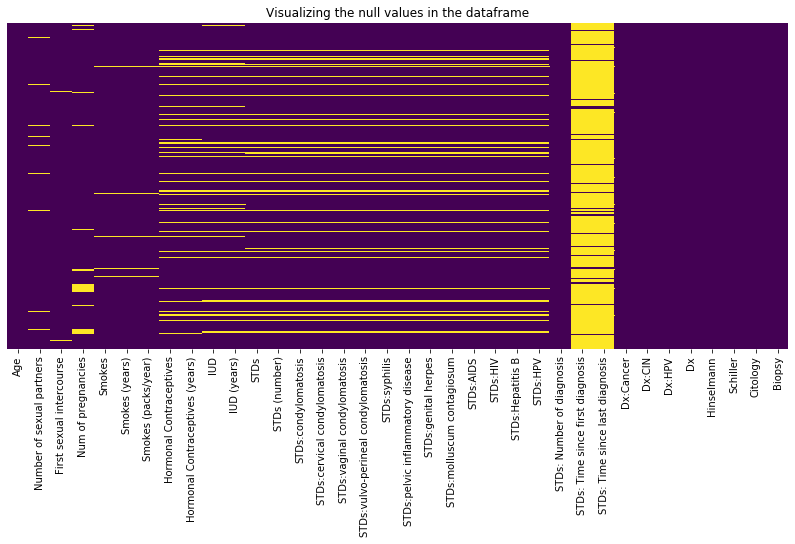

In [7]:
# Visualizing the null values in the dataframe
plt.figure(figsize=(14, 6)) # Changing the figure size
sns.heatmap(data.isnull(), cmap='viridis', cbar=None, yticklabels=False)
plt.title('Visualizing the null values in the dataframe');

In [8]:
# Correlation betweeen features and target variables
data.corr()[['Hinselmann', 'Citology','Schiller','Biopsy']]

,Hinselmann,Citology,Schiller,Biopsy
Age,-0.003967,-0.016862,0.103283,0.055956
Number of sexual partners,-0.039847,0.021858,-0.008967,-0.001442
First sexual intercourse,-0.016549,-0.010973,0.003495,0.007264
Num of pregnancies,0.040439,-0.030036,0.092017,0.046416
Smokes,0.035021,-0.003957,0.054322,0.029356
Smokes (years),0.072251,-0.006827,0.095890,0.062044
Smokes (packs/year),0.027044,0.004666,0.018191,0.024882
Hormonal Contraceptives,0.033654,-0.011317,-0.004276,0.007750
Hormonal Contraceptives (years),0.038945,0.076263,0.079247,0.079388
IUD,0.044821,0.007628,0.085748,0.053194


In [9]:
# More insights on the columns that do not correlate with the target variables
data[['STDs:AIDS', 'STDs:cervical condylomatosis']].apply(lambda x: x.value_counts())

,STDs:AIDS,STDs:cervical condylomatosis
0.0,753,753


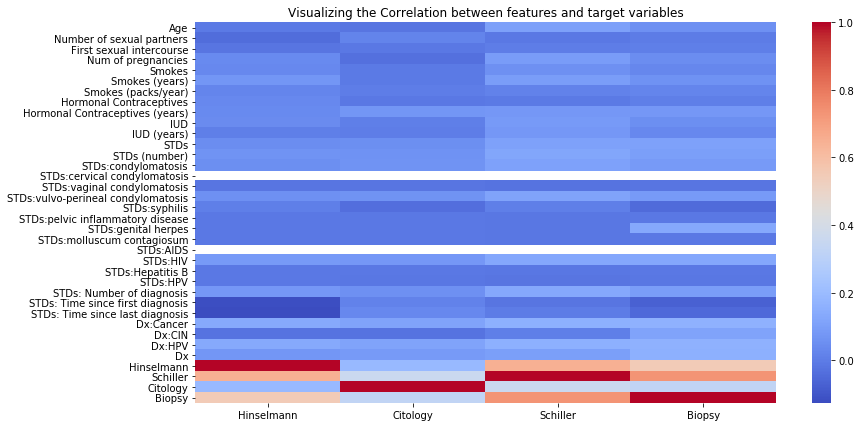

In [10]:
# Visualizing the Correlation between features and target variables
plt.figure(figsize=(13, 7))
sns.heatmap(data.corr()[['Hinselmann', 'Citology','Schiller','Biopsy']], cmap='coolwarm')
plt.title("Visualizing the Correlation between features and target variables");

In [11]:
# Number of duplicated data
data.duplicated().value_counts()

False    835
True      23
dtype: int64

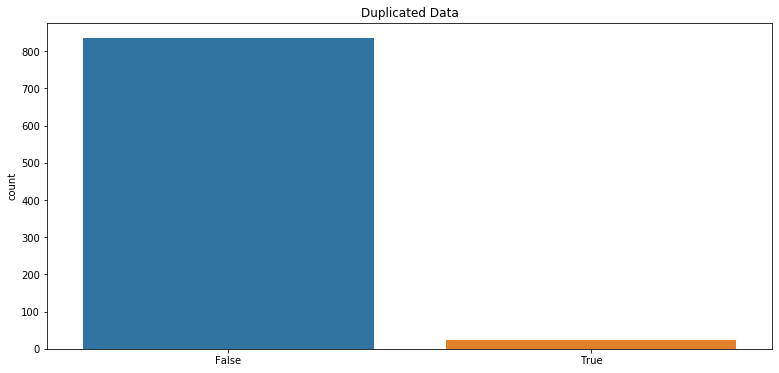

In [12]:
# Visualizing the duplicated data
plt.figure(figsize=(13, 6))
sns.countplot(data.duplicated())
plt.title("Duplicated Data");

# Data Cleaning
From our initial data examination, three things were observed:
- Presence of duplicated data
- Presence of null values
- Columns showed NaN when correlated with the target variables
- Multi-colinearlity with STD related columns

#### Presence of Null values
While there are a lot of columns with null values, any column with null values that exceed **50% of the dataset** would be dropped while the others would be filled with the mode (as they are mainly categorical values).

#### Columns not correlated with target variables
It was also observed that only one value (0) exist in the **STDs:AIDS**	and **STDs:cervical condylomatosis** columns hence the reason for no correlation with the target variables.

#### Multi-Colinearlity
From the exploration, it was observed that the STD column and the various STD related columns have high correlation. To avoid the possibility of multicolinearlity, the **STDs column would be dropped**.

#### Removing columns with Dx
Given that, we have not been able to get the meaning of the columns prefixed by Dx, the columns would be dropped

In [13]:
# Dropping duplicate data
data.drop_duplicates(inplace =True)

In [14]:
# Given that over 90% of the values in two columns are missing, we would drop them
data.drop(columns=['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], inplace=True)

# Indexing the remaining columns with the null values
columns_with_null_values = data.isna().sum()[data.isna().sum() > 0].index

# Filling the columns with null values
for col in columns_with_null_values:
    data[col]= data[col].fillna(data[col].median())

In [15]:
# Exploring the STD column
data['STDs'].value_counts()

0.0    756
1.0     79
Name: STDs, dtype: int64

In [16]:
# Checking the various columns related to STD to see if they would have similar values
(
(data['STDs:condylomatosis'] == 1.0) | (data['STDs:vaginal condylomatosis'] == 1.0) 
| (data['STDs:vulvo-perineal condylomatosis'] == 1.0) | (data['STDs:syphilis'] == 1.0)
| (data['STDs:pelvic inflammatory disease'] == 1.0) | (data['STDs:genital herpes'] == 1.0)
| (data['STDs:molluscum contagiosum'] == 1.0) | (data['STDs:HIV'] == 1.0)
| (data['STDs:Hepatitis B'] == 1.0) | (data['STDs:HPV'] == 1.0) 
).value_counts()

False    756
True      79
dtype: int64

In [17]:
# Dropping the columns that did not correlate with the target variables
data.drop(columns=['STDs:AIDS', 'STDs:cervical condylomatosis', 'STDs'], inplace=True)

# Removing the columns with Dx
data.drop(columns=data.keys()[[i.__contains__('Dx') for i in data.keys()]], inplace=True)

In [18]:
# Previewing the dataset after filling the null values
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


## Exploratory Data Analysis


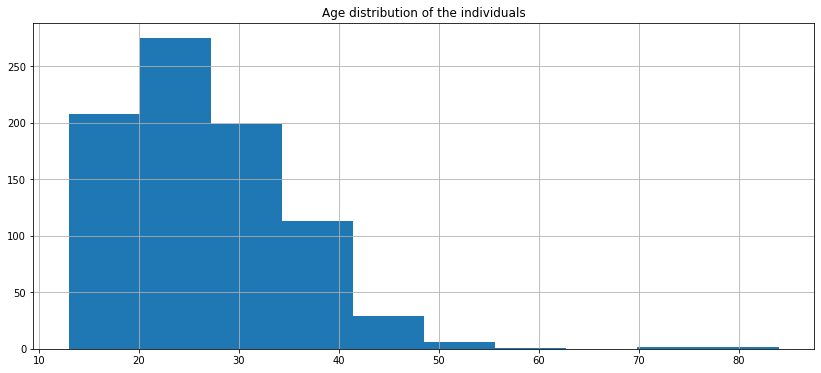

In [19]:
#  Age Distribution
data['Age'].hist(figsize=(14, 6))
plt.title("Age distribution of the individuals");

### Visualizing the Target Variables

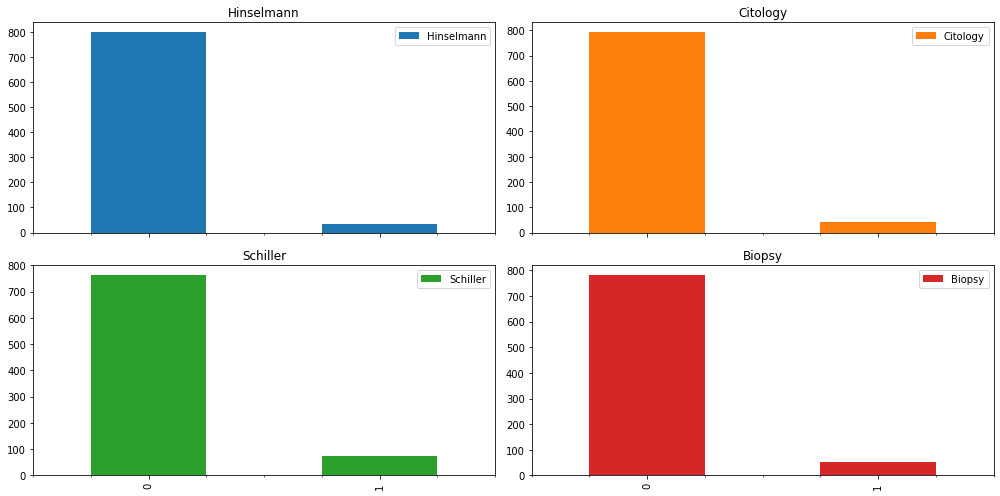

In [20]:
# Plotting the 'Hinselmann', 'Citology','Schiller','Biopsy' columns
data[['Hinselmann', 'Citology','Schiller','Biopsy']].apply(lambda x: x.value_counts()).plot.bar(
    layout = (2,2), subplots=True, figsize=(14, 7))

# Formatting the figure
plt.tight_layout();

## Feature Engineering

As shown in the figure above, the target variables **'Hinselmann', 'Citology','Schiller','Biopsy'** are all tests necessary for the detection of Cervical cancer. Given that the features shown in the figure above are unbalanced, it would be best to resample the minority class to avoid the our models overfitting on the majority class. 

In [21]:
# Targets variables
targets = ['Hinselmann', 'Citology','Schiller','Biopsy']

# Features of the dataset
features = data.drop(columns=['Hinselmann', 'Citology','Schiller','Biopsy']).keys()

In [22]:
# The minority class consists of the rows where the target variable  equals 1.0
minority_class = data.loc[(data['Hinselmann'] == 1.0) | (data['Citology'] == 1.0) | (data['Schiller'] == 1.0) | (data['Biopsy'] == 1.0)]
majority_class = data.loc[(data['Hinselmann'] != 1.0) & (data['Citology'] != 1.0) & (data['Schiller'] != 1.0) & (data['Biopsy'] != 1.0)]

In [23]:
# Upsampling the data
data_upsampled = resample(minority_class,
                          replace=True, # sample with replacement
                          n_samples=len(minority_class), # match number in majority class
                          random_state=0) # Random state of 1

# Splitting the dataset into test and train with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(data_upsampled[features], data_upsampled[targets],
                                                test_size=0.2, random_state=0)

# Converting the y_dataframes to arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# An instance of the min-max scaler
scaler = MinMaxScaler()

# Scaling the dataset
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training and prediction
Given that there are four target variables, we would use train the various models on each of the dataset and predict the outcome.

In [24]:
# Target variables
labels = ['Hinselmann', 'Citology','Schiller','Biopsy']

# List to hold the classification metrics
accuracy, precision, recall, f1_score = [], [], [], []

for i in range(4):
    # Instantiating the various classifier models
    NBClassifer = MultinomialNB(fit_prior = False)
    SVClassifer = SVC()
    LogClassifier = LogisticRegression()
    DTClassifier = DecisionTreeClassifier()
    KNNClassifier = KNeighborsClassifier(n_neighbors = 10)
    
    # Using the Stacking classifier Ensemble method
    Ensemble=StackingClassifier(estimators=[('SVC',SVClassifer),('LR',LogClassifier),
                                         ('KNN',KNNClassifier),('NB',NBClassifer),
                                         ('DT',DTClassifier)],cv=2)

    # Fitting the models with the dataset (one target variable at a time)
    Ensemble.fit(X_train, y_train[:,i])
    
    # Predicting the features
    Ensemble_pred = Ensemble.predict(X_test)

    accuracy.append(accuracy_score(y_test[:,i], Ensemble_pred)) # Appending the accuracy score
    
    pre1, rec1, f1, sup = precision_recall_fscore_support(y_test[:,i], Ensemble_pred, average = 'binary', labels = [0, 1])
    precision.append(pre1)
    recall.append(rec1)
    f1_score.append(f1)
    print(labels[i])
    print("\tAccuracy :", accuracy[-1])
    print("\tPrecision :", precision[-1])
    print("\tRecall :", recall[-1])
    print("\tF1 score :", f1_score[-1])

Hinselmann
	Accuracy : 0.6666666666666666
	Precision : 0.5
	Recall : 0.42857142857142855
	F1 score : 0.4615384615384615
Citology
	Accuracy : 0.7619047619047619
	Precision : 0.6153846153846154
	Recall : 1.0
	F1 score : 0.761904761904762
Schiller
	Accuracy : 0.7619047619047619
	Precision : 0.6666666666666666
	Recall : 1.0
	F1 score : 0.8
Biopsy
	Accuracy : 0.47619047619047616
	Precision : 0.6666666666666666
	Recall : 0.3076923076923077
	F1 score : 0.42105263157894735


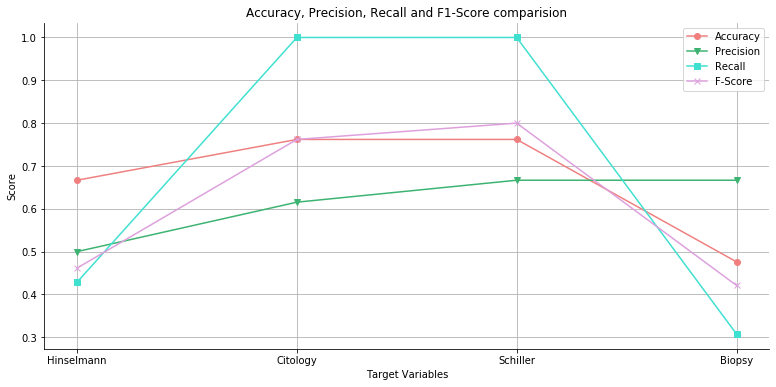

In [25]:
# Plotting the graph for the evaluation metrics
plt.figure(figsize=(13, 6)) # Tweaking the figure size

plt.plot(labels, accuracy, color = 'lightcoral',marker='o',label = 'Accuracy') # Accuracy
plt.plot(labels, precision, color = 'mediumseagreen',marker='v',label = 'Precision') # Precision
plt.plot(labels, recall, color = 'turquoise',marker='s',label = 'Recall') # Recall 
plt.plot(labels, f1_score,   color = 'plum',marker='x',label = 'F-Score') # F1 Score

plt.xlabel("Target Variables") # Tweaking the x label 
plt.ylabel("Score") # Tweaking the y label
plt.title("Accuracy, Precision, Recall and F1-Score comparision") # Changing the graph title

# Changing the graph properites
plt.legend() 
plt.grid()
sns.despine()

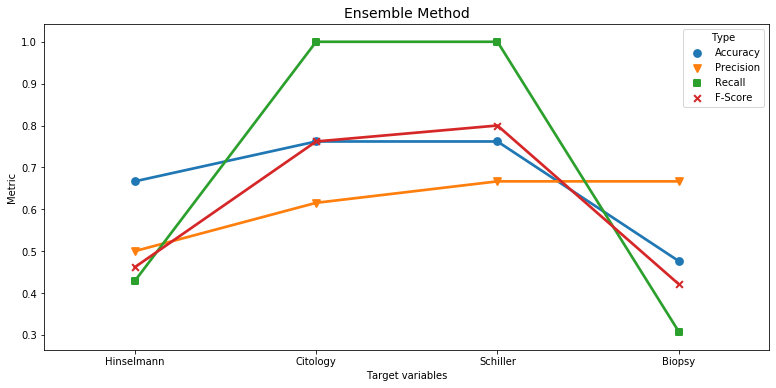

In [26]:
plt.figure(figsize=(13, 6))

# Creating a dataframe to hold the metrics of the various target variables
metrics_ensemble = pd.DataFrame({'Target variables':labels*4,
                  'Metric':accuracy+precision+recall+f1_score, 
                  'Type':["Accuracy"]*4+["Precision"]*4+["Recall"]*4+["F-Score"]*4})

sns_plot = sns.pointplot(x="Target variables", y="Metric", hue="Type", markers=["o", "v", "s", "x"], data=metrics_ensemble)
plt.title("Ensemble Method", size=14);

## Multi-Label Classification

After predicting the outcome of the variables one at a time, we then proceeed to use multi-label classification with five models to see the one with the best classification metrics.

In [27]:
# Model names
model_names = ["Naive Bayes", "SVM", "Logistic Regression", "KNN",  "Decision Tree"]

# list to append the accuracy
accuracy_ml = []

# Instantiating the models
models = [MultinomialNB(), SVC(C = 2000, kernel = 'rbf'), LogisticRegression(C=1, solver='newton-cg'), 
         KNeighborsClassifier(weights='distance'), DecisionTreeClassifier(class_weight='balanced',random_state=42)]

# Dictionary to hold the model score and classification report
results = {}

# Looping through the model
for name, model in zip(model_names, models):
    model = MultiOutputClassifier(model) # Converts the model to a multi-output classifier
    model.fit(X_train, y_train) # fitting the model
    y_pred = model.predict(X_test) # predicting the multiclass outputs
    
    # Assigning the model result back to the dictionary
    results[name] = [('Testing Accuracy', model.score(X_test, y_test)), classification_report(y_test, y_pred)] 
    
    # Appending the accuracy to the accuracy_ml list
    accuracy_ml.append(model.score(X_test, y_test))

In [28]:
# Printing out the result of the various models
for key, val in results.items():
    print('--'* 30)
    print('\t\t'"{} - {}: {}".format(key, val[0][0], round(val[0][1], 4))) # Prints out the Name and accuracy of the model
    print('--' * 30)
    print(val[1]) # Prints out the classification report

------------------------------------------------------------
		Naive Bayes - Testing Accuracy: 0.0476
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.67      0.25      0.36         8
           2       0.48      1.00      0.65        10
           3       0.50      0.38      0.43        13

   micro avg       0.50      0.45      0.47        38
   macro avg       0.41      0.41      0.36        38
weighted avg       0.44      0.45      0.40        38
 samples avg       0.48      0.38      0.38        38

------------------------------------------------------------
		SVM - Testing Accuracy: 0.5238
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.40      0.29      0.33         7
           1       0.75      0.75      0.75         8
           2       0.69      0

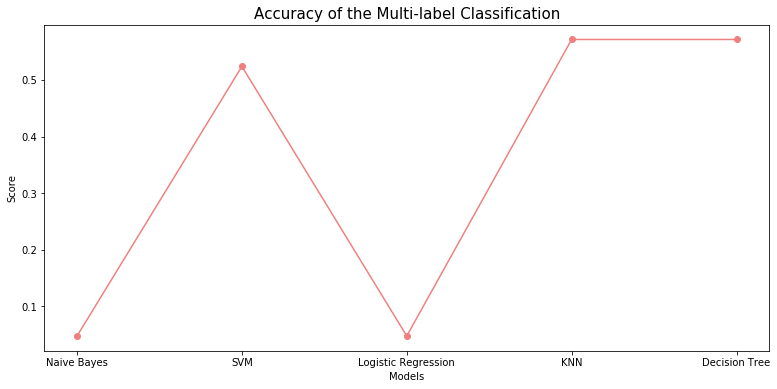

In [29]:
# Plotting the accuracy of the models
plt.figure(figsize=(13, 6))

# Plotting the accuracy as a line plot
plt.plot(model_names, accuracy_ml, color = 'lightcoral',marker='o',label = 'Accuracy')

# Tweaking the figure titles
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Accuracy of the Multi-label Classification", size=15);

# Conclusion

Given the accuracy of the models, SVM, KNN and Decision Trees were the best performing models.